### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
import numpy as np
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [453]:
# load dataset
data = pd.read_csv('vehicle.csv')
print(data.shape)
data.dropna(inplace=True)

(846, 19)


In [454]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [455]:
data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [456]:
data["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

class
bus    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
car    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
van    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

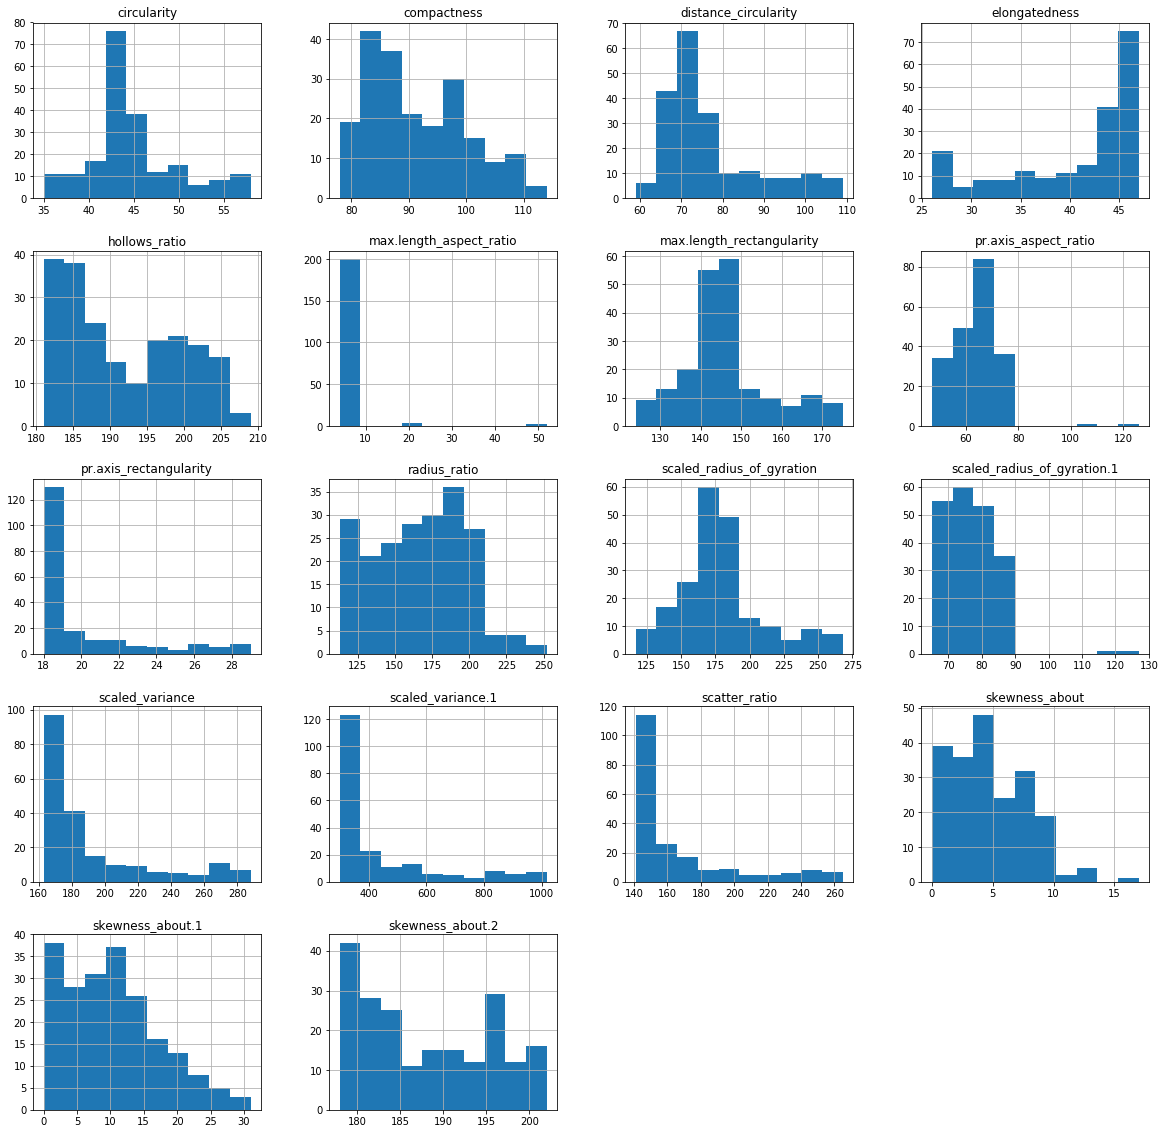

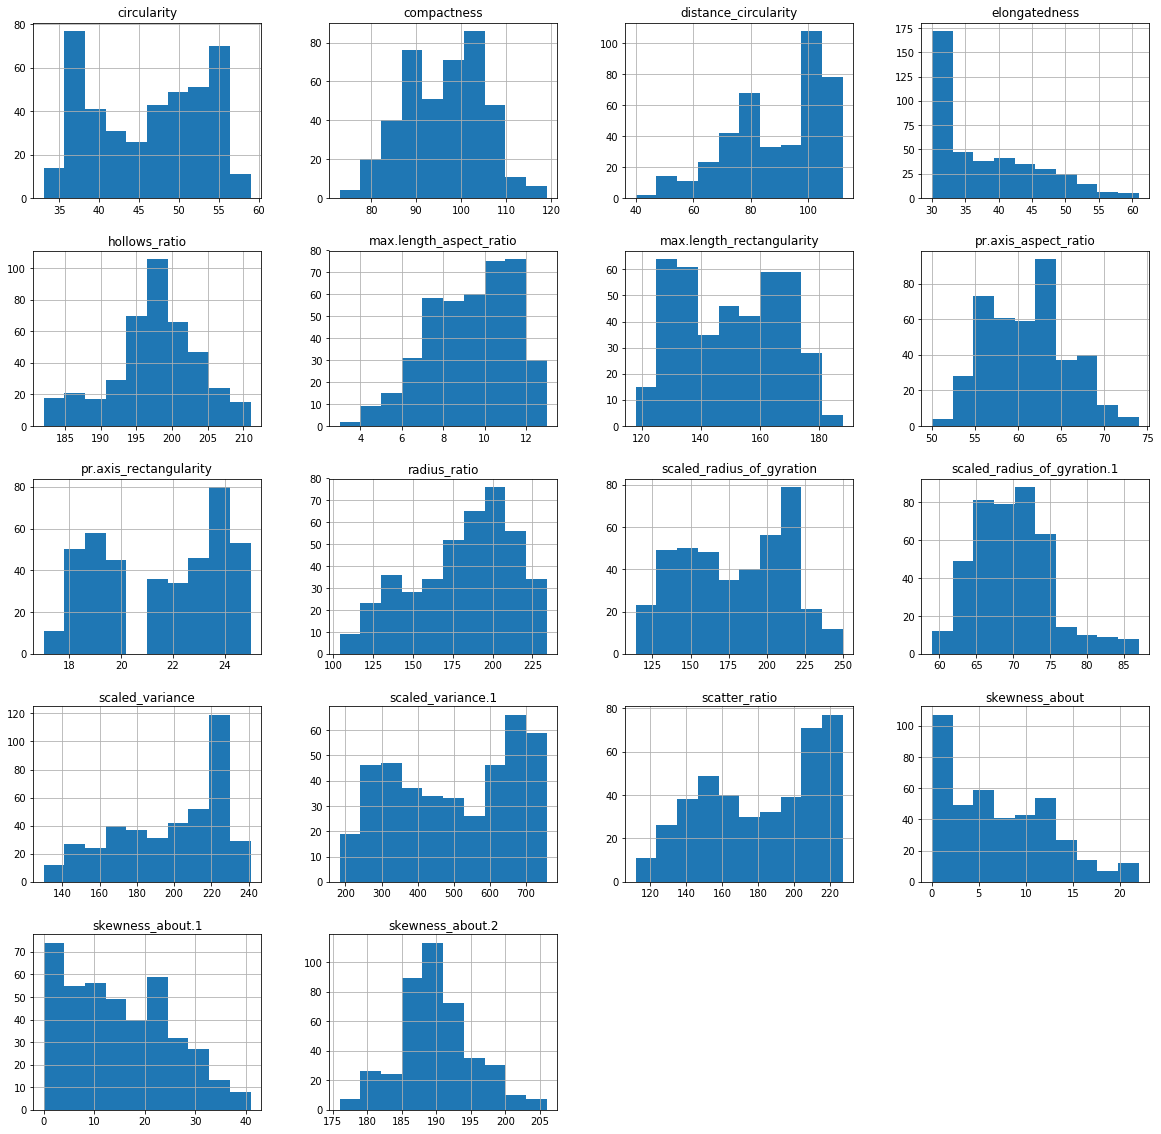

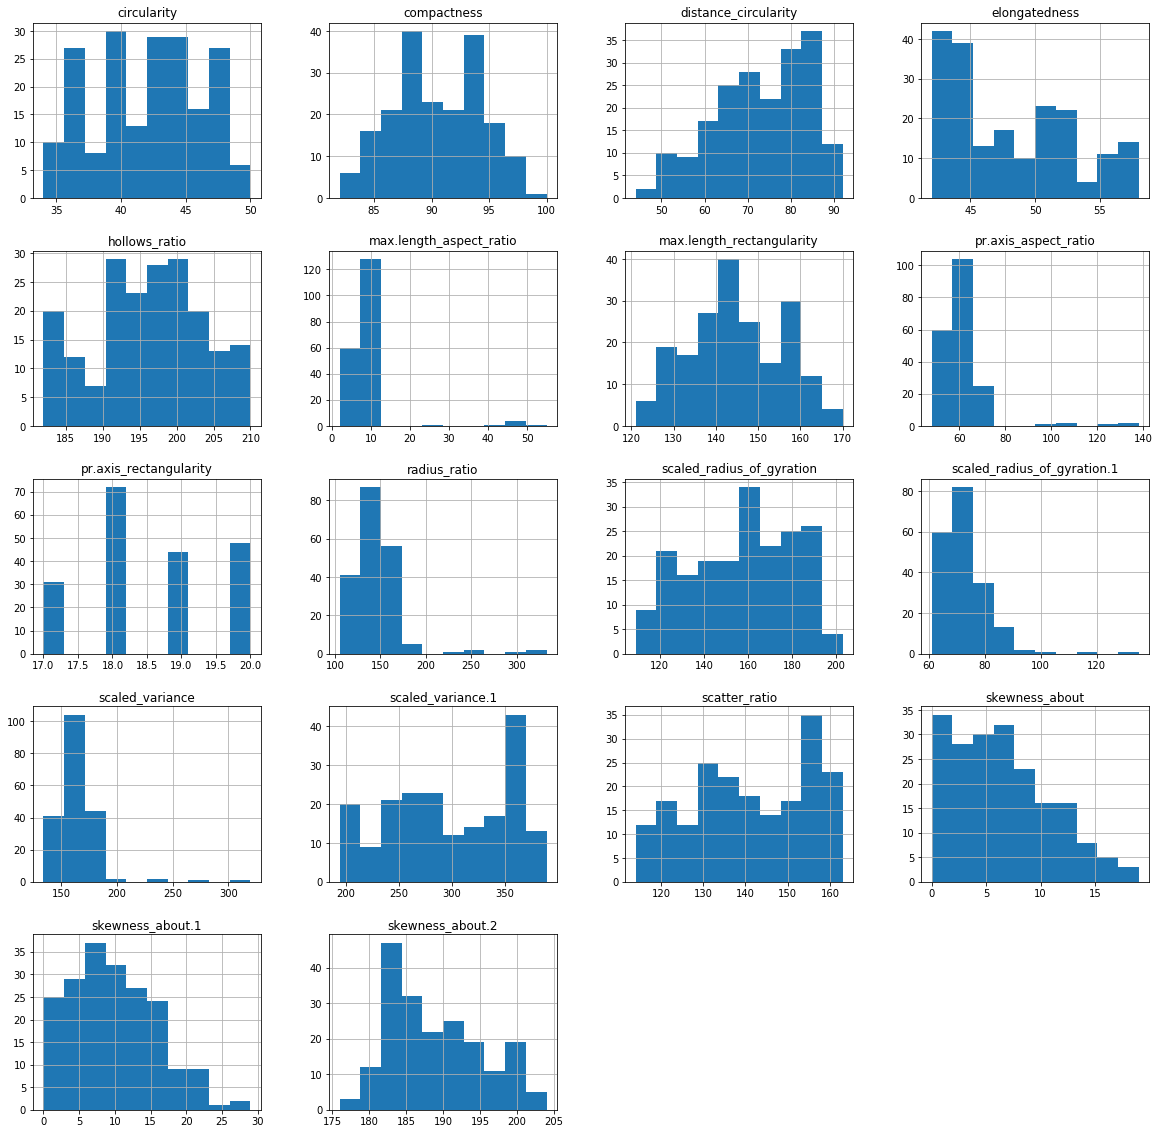

In [457]:
data.groupby("class").hist(figsize=(20, 20))

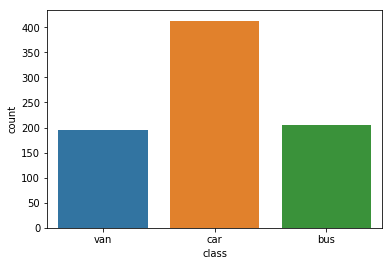

In [458]:
sns.countplot(data["class"])

### Check for any missing values in the data 

In [459]:
data.info()
#There are no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

In [460]:
dataNewdf = data.drop(["class"], axis=1)
dataNormalized = dataNewdf.apply(zscore)
print(dataNormalized.shape)

(813, 18)


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [461]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [462]:
clusters = range( 1,10)
cluster_errors = []
for num_clusters in clusters:
  model = KMeans( num_clusters)
  model.fit(dataNormalized)
  prediction = model.predict(dataNormalized)
  distortion.append(sum(np.min(cdist(dataNormalized, model.cluster_centers_, 'euclidean'), axis=1)) / dataNormalized.shape[0])


### 6. Plotting Elbow/ Scree Plot

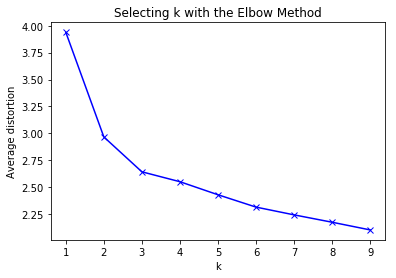

In [463]:
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [464]:
#The optimal value of k is 3

In [465]:
final_model=KMeans(n_clusters=3, n_init=15,random_state=10)
final_model.fit(dataNormalized)
prediction=final_model.predict(dataNormalized)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [466]:
#Append the prediction 
data["GROUP"] = prediction
data[["class", "GROUP"]]

,class,GROUP
0,van,0
1,van,0
2,car,1
3,van,0
4,bus,2
6,bus,0
7,van,0
8,van,0
10,van,0
11,car,0


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [467]:
centroids = final_model.cluster_centers_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024181646518>,
      dtype=object)

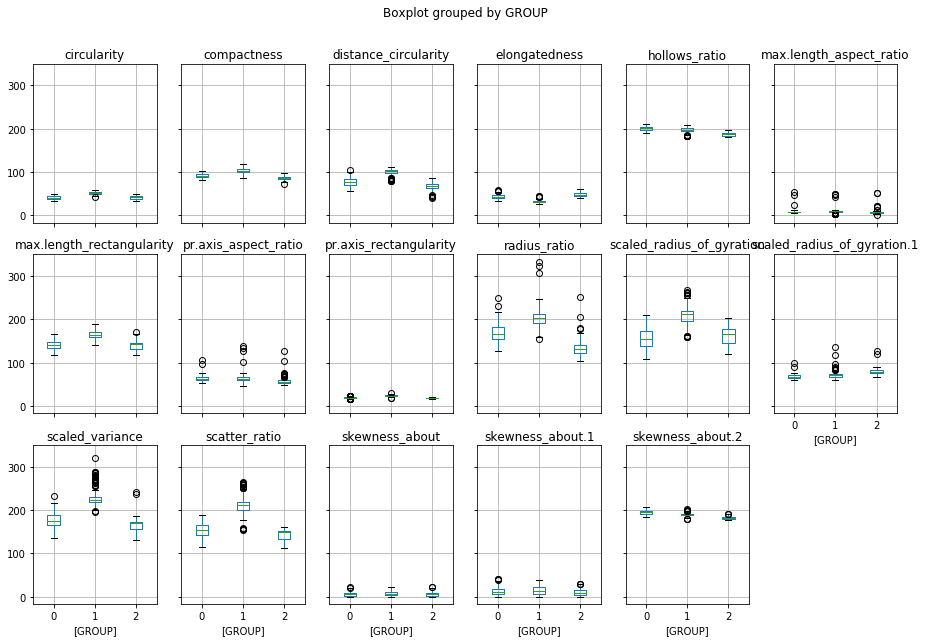

In [468]:
data.drop(["scaled_variance.1"], axis=1).boxplot(by = 'GROUP',  layout=(3,6), figsize=(15, 10))

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [469]:
centroid_df = pd.DataFrame(centroids, columns = list(dataNormalized) )

Hint: Use pd.Dataframe function 

In [470]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


### Use kmeans.labels_ function to print out the labels of the classes

In [471]:
dataNormalized['labels']=(pd.DataFrame(final_model.labels_, columns=list(['labels'])))

In [472]:
pd.value_counts(dataNormalized['labels'])

0.0    297
1.0    251
2.0    232
Name: labels, dtype: int64

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [473]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [474]:
newDf = pd.DataFrame(np.concatenate([a,b,c]))

In [475]:
print(newDf)

             0          1
0     9.615405   1.540570
1     9.546359   0.749984
2    11.368890   0.229836
3     9.674648  -2.444948
4    10.531613  -1.064873
5    10.034070   1.759024
6    10.262514   2.662510
7    11.161790   2.012503
8     9.299858  -0.012800
9    10.109504  -0.671983
10   12.726245   0.334047
11    9.065870   0.283477
12    9.056200  -2.114915
13   12.992473   0.266959
14   10.275654   4.189331
15   12.598070   3.277536
16   11.597876   0.511167
17   10.059957   3.170386
18   10.492962   0.388501
19   12.896299   2.720633
20   10.101605  -0.092204
21    9.861265   1.382273
22    9.545209   1.159104
23    6.347042  -5.361256
24   10.632861  -0.771013
25    8.843918   0.029794
26   11.416437  -4.262042
27    7.083994   2.512864
28   12.803002   0.135723
29    9.478346   1.415554
..         ...        ...
220  10.760142  20.829425
221  14.338567  17.426527
222   9.585759  16.396463
223  13.694355  19.437450
224  11.943260  20.189364
225  13.347012  23.500429
226  11.6912

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241815DA898>,
      dtype=object)

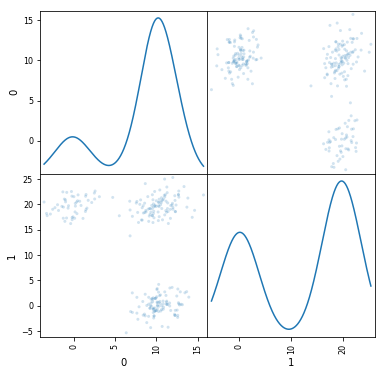

In [476]:
scatter_matrix(newDf, alpha=0.2, figsize=(6, 6), diagonal='kde')

### 11. Find out the linkage matrix

In [477]:
Z = linkage(newDf, 'ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(newDf))
print(c)

0.9568948684587903


Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

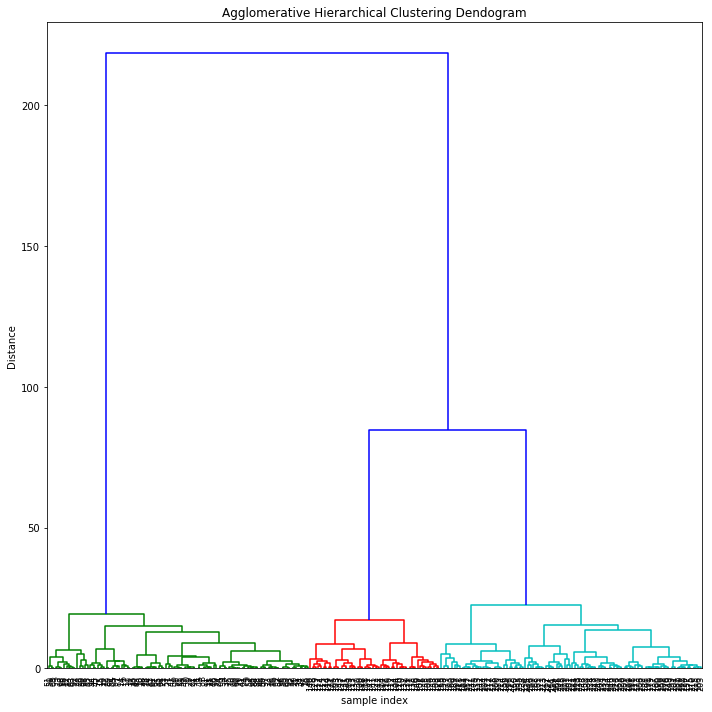

In [478]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,color_threshold = 40, leaf_font_size=8)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

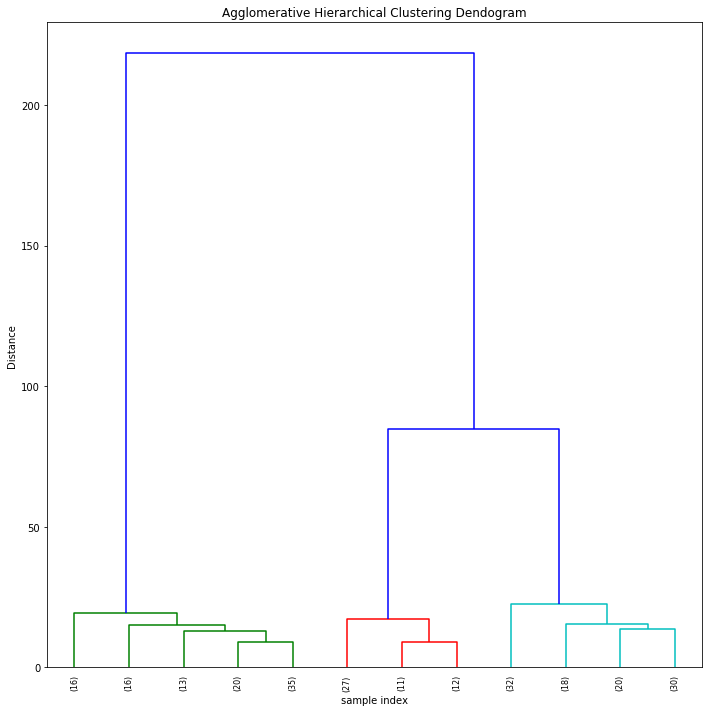

In [479]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90,color_threshold = 40, leaf_font_size=8, truncate_mode='lastp', p=12)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [480]:
#The optimal distance between the clusters from the dendogram is 50, which can hence be used as an input for clustering data.

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [492]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(newDf)
fCluster = fcluster(Z, t=0.9, criterion='distance')
print(fCluster)

[ 25  26  35   2  30  24  16  15  27  33  18  27   3  18  17  11  35  16
  38  11  37  24  25   8  30  27   5  21  18  25  38  37  37  35  38  20
  36  30   6  16  18  32  22  18   9   9  34  38  26  25   1   1  33   7
  14  36  34  23   4  24  31  19  10   3  20  14  30  19   1  36  31  20
  13   2  19  31  28  12  19  31  13  27  35   3  33  19  35  15  33   5
  29  25   3  36  32  33  24  34   2  31  48  49  57  44  55  58  44  51
  59  47  54  56  53  46  52  41  51  40  49  42  54  42  50  59  40  57
  58  45  39  39  48  45  54  59  53  57  51  46  56  54  43  50  50  44
  41  45  56  49  48  60  74  67  92  68  80  66  71 103  61 100  65  81
  81  95  67  78  99  79  78  96  68  78  69  97  69 103 100  61  70  99
  91 102  83  74  87  70 104  67  99  64  99  99 102  61  93  72  73  62
  96 101  70  84  85 104 101  82  97  69 100  96 104  98  67  78  70 104
  95  69  63  86 102  89  73  88  91  76  95  81  91  81 102  96  97  93
  93  75  77  99  75  90  93  68  68  95  94  82  9

### Use matplotlib to visually observe the clusters in 2D space 

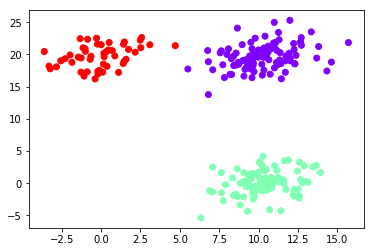

In [493]:
plt.scatter(newDf[0], newDf[1], c=cluster.labels_, cmap='rainbow')  